In [1]:
import pylcp
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const
from sympy.physics.wigner import wigner_3j, wigner_6j, wigner_9j
import time
import pathos
from sympy import Symbol
import numbers
gamma = 2*np.pi*84e6 # Hz
k = 2*np.pi/227.5e-9 # m^-1

t_unit = 1/gamma
#t_unit = 1e-1

m_unit = 1/k
#m_unit = 1e-9

velocity_unit = m_unit/t_unit
accel_unit = m_unit/t_unit**2
Hz_unit = 1/t_unit
Js_unit = const.hbar # kg m^2/s
mass_unit = Js_unit*t_unit/m_unit**2
HzperT_unit = const.value("Bohr magneton")/(Js_unit)
T_unit = Hz_unit/HzperT_unit
amu_unit = mass_unit/1.66e-27
cm_unit = m_unit/1e-2
F_unit = mass_unit*m_unit/t_unit**2
I_sat = (np.pi*const.h*const.c*gamma)/(3*227.5e-9**3) # W/m^2
print(t_unit)
print(cm_unit)
print(velocity_unit)
print(accel_unit)
ksim=k*m_unit
gammasim=gamma/Hz_unit
print(ksim)
print(gammasim)
# (F1, F) IAl = 5/2, IF = 1/2, F1 = J + IAl, F = F1 + IF
labels = [(3/2,1),(3/2,2),(5/2,2),(5/2,3),(7/2,3),(7/2,4)]
full_labels = np.concatenate([[(i[0], i[1], j) for j in np.arange(-i[1],i[1]+1,1)] for i in labels])
obe_kwargs = dict(itermax=10, rel=1e-6, abs=(1000*(46*1.66e-27)/(F_unit))**2, #deltat_func = lambda r, v : 1/gammasim+0*(1/gammasim if ksim/abs(v[0]) < 1/gammasim else 2*np.pi/ksim/abs(v[0])), deltat_r=np.inf,
                  deltat_tmax = 500/gammasim, deltat_v=500/ksim,
                  Npts=25001, debug = False, rtol=1e-4, reset_pos = False,
                  atol=np.concatenate(([1e-4]*72*72,[1/velocity_unit,1/velocity_unit,1/velocity_unit,1e-2/cm_unit,1e-2/cm_unit,1e-2/cm_unit])))

1.8947017034749446e-09
3.6207749553406186e-06
19.11
10086020382.496958
1.0
1.0000000000000002


In [2]:
import dill
with open("AlF_v0_-1.dump", 'rb') as file:
    obe = dill.load(file)

In [3]:
obe.laserBeams={
    'X(v=0)->A(v=0)' : pylcp.laserBeams([
        {'kvec':np.array([1/np.sqrt(2),1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([-1/np.sqrt(2),1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([-1/np.sqrt(2),-1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([1/np.sqrt(2),-1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([0,0,-1.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':0.3},
        {'kvec':np.array([0,0, 1.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':0.3}
    ], beam_type=pylcp.infinitePlaneWaveBeam)}

In [10]:
R = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-0/velocity_unit, 150/velocity_unit, 150) 

obe.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                           [v                ,np.zeros(v.shape),np.zeros(v.shape)],
                           name='Frad', progress_bar=True, **obe_kwargs)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(v*velocity_unit, (obe.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)

c:\Users\LP618\Anaconda3\lib\site-packages\pylcp-1.0.2-py3.9.egg\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part


KeyboardInterrupt: 

Completed in 0.34 s.                                              


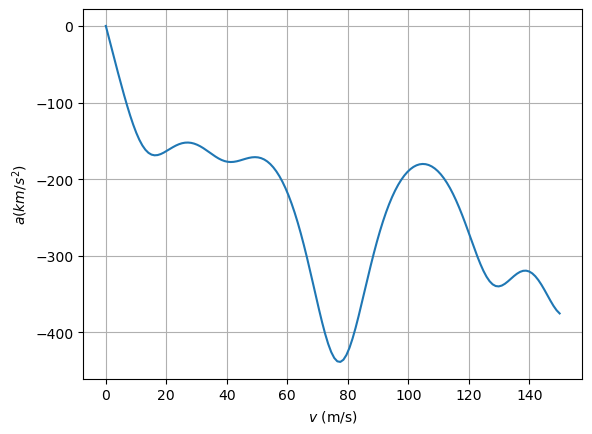

In [ ]:
rateeq = pylcp.rateeq(obe.laserBeams, obe.magField, obe.hamiltonian, include_mag_forces = False)
R = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-0/velocity_unit, 150/velocity_unit, 150) 

rateeq.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                           [v                ,np.zeros(v.shape),np.zeros(v.shape)],
                           name='Frad', progress_bar=True)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(v*velocity_unit, (rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)

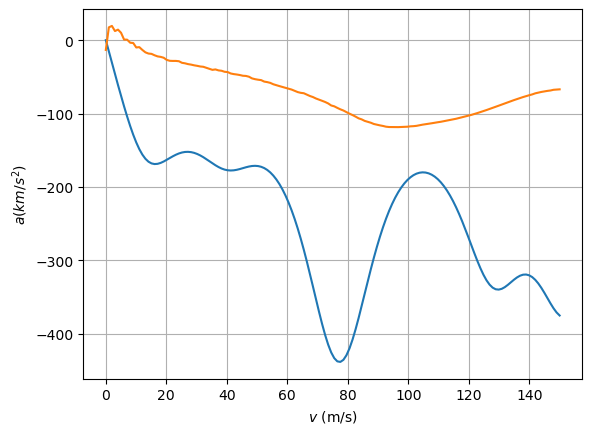

In [ ]:
fig, ax = plt.subplots(1, 1)
colormesh = ax.plot(v*velocity_unit, (rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.plot(v*velocity_unit, (obe.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)


c:\Users\LP618\Anaconda3\lib\site-packages\pylcp-1.0.2-py3.9.egg\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part


Completed in 0.88 s.                                               


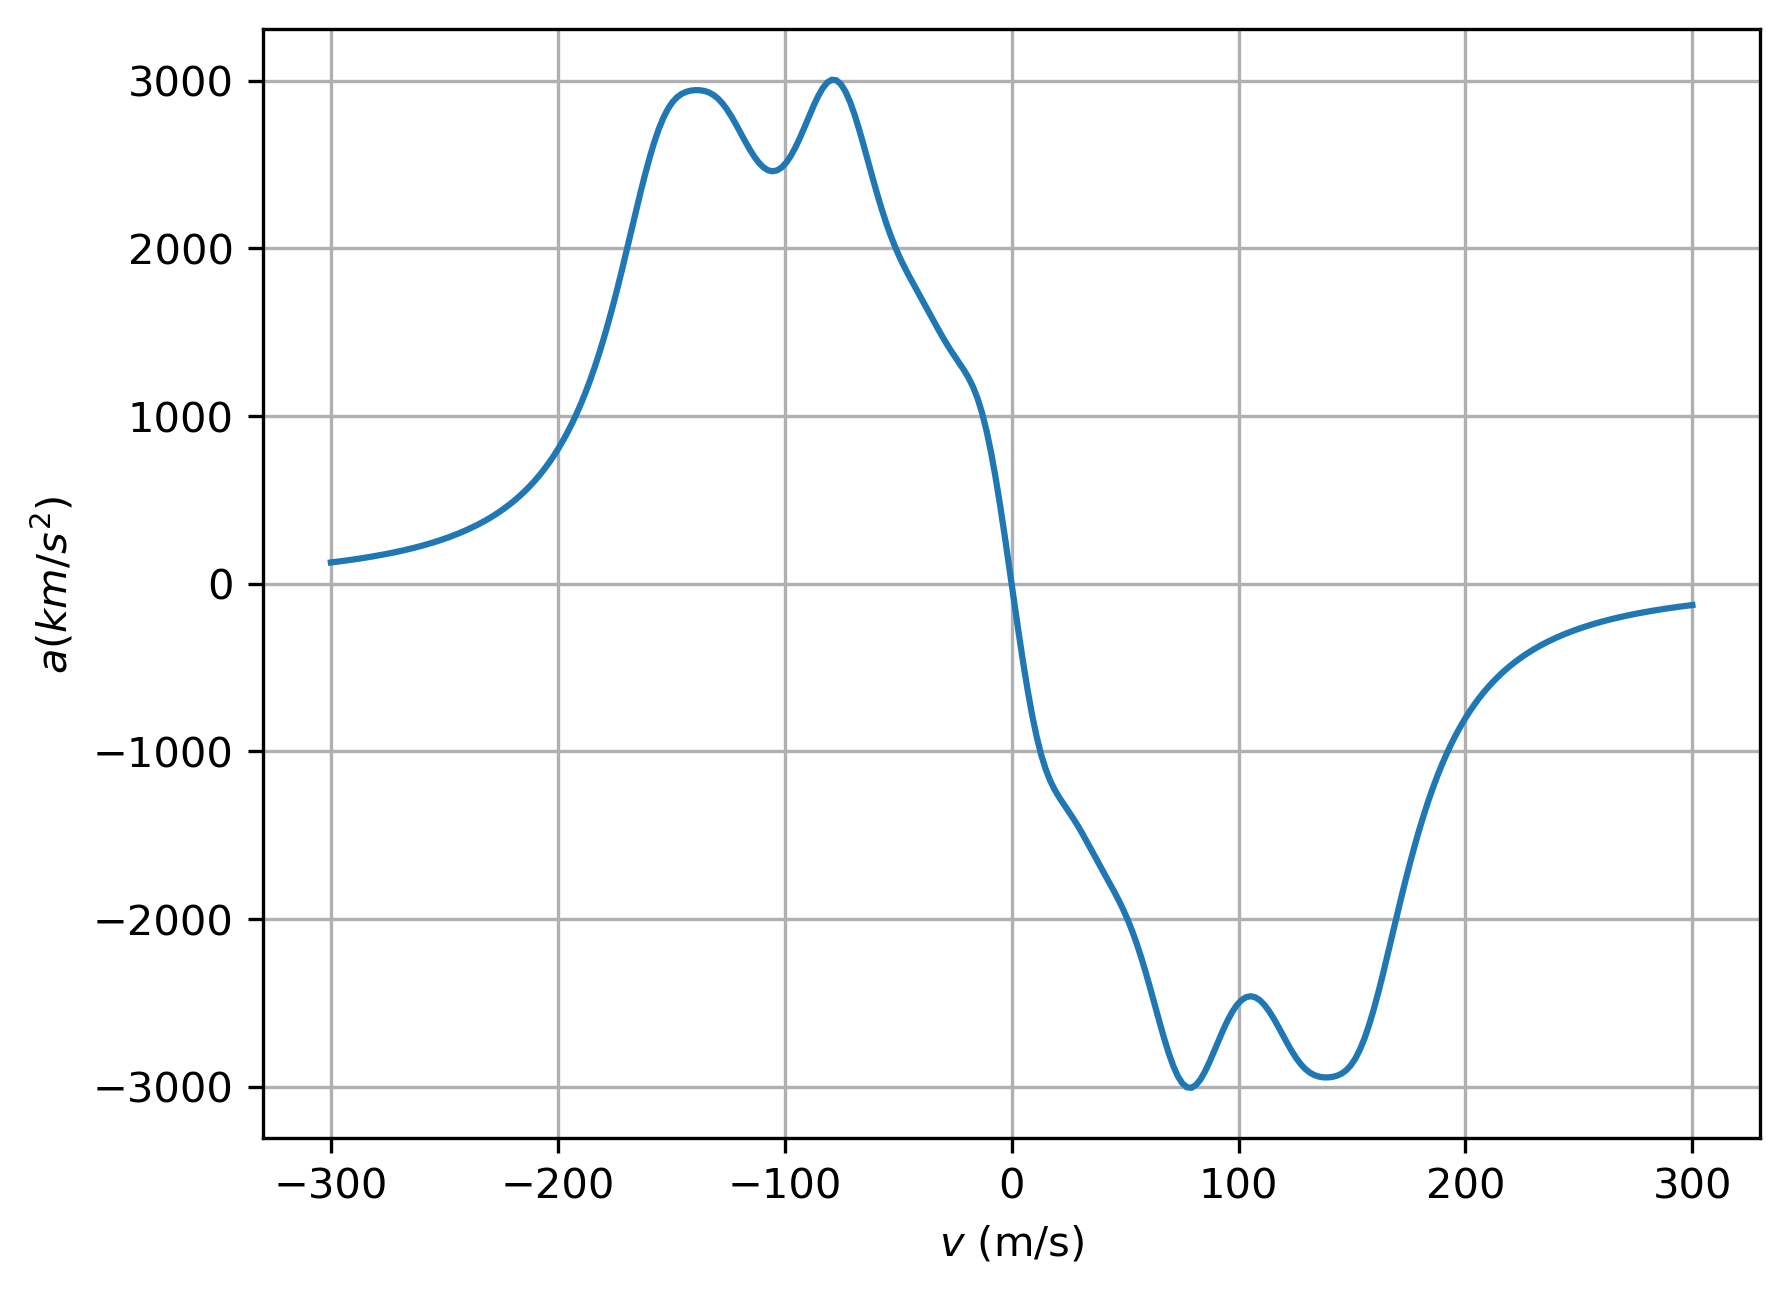

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = [6.4, 4.8]
mpl.rcParams['figure.dpi'] = 300


s = 2*0.2/(np.pi*(0.00125**2))/I_sat
obe.laserBeams={
    'X(v=0)->A(v=0)' : pylcp.laserBeams([
        {'kvec':np.array([1/np.sqrt(2),1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':s},
        {'kvec':np.array([-1/np.sqrt(2),1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':s},
        {'kvec':np.array([-1/np.sqrt(2),-1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':s},
        {'kvec':np.array([1/np.sqrt(2),-1/np.sqrt(2), 0.])*ksim, 'pol':1, 'delta':-gammasim/2, 's':s},
        {'kvec':np.array([0,0,-1.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':s},
        {'kvec':np.array([0,0, 1.])*ksim, 'pol':-1, 'delta':-gammasim/2, 's':s}
    ], beam_type=pylcp.infinitePlaneWaveBeam)}

rateeq = pylcp.rateeq(obe.laserBeams, obe.magField, obe.hamiltonian, include_mag_forces = False)
R = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-300/velocity_unit, 300/velocity_unit, 300) 

rateeq.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                           [v                ,np.zeros(v.shape),np.zeros(v.shape)],
                           name='Frad', progress_bar=True)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot(v*velocity_unit, (rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)

In [ ]:
2*0.018/(np.pi * 0.002**2)/I_sat

0.3072361646258786

In [7]:
savedata = np.array([v*velocity_unit, (rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27)]).T

In [8]:
np.savetxt("s1_force_profile.csv",savedata,delimiter=',',header="s=1\nv [m/s], a[km/s^2]")
colormesh = ax.plot(v*velocity_unit, (rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27))

In [4]:
Es = np.array([9.06039e7, 0., 2.09987e8, 1.99498e8, 3.61039e8, 4.36374e8])
g = 84e6
k0 = 1/227.5e-9

c:\Users\LP618\Anaconda3\lib\site-packages\pylcp-1.0.2-py3.9.egg\pylcp\rateeq.py:264: ComplexWarning: Casting complex values to real discards the imaginary part


Completed in 0.62 s.                                               


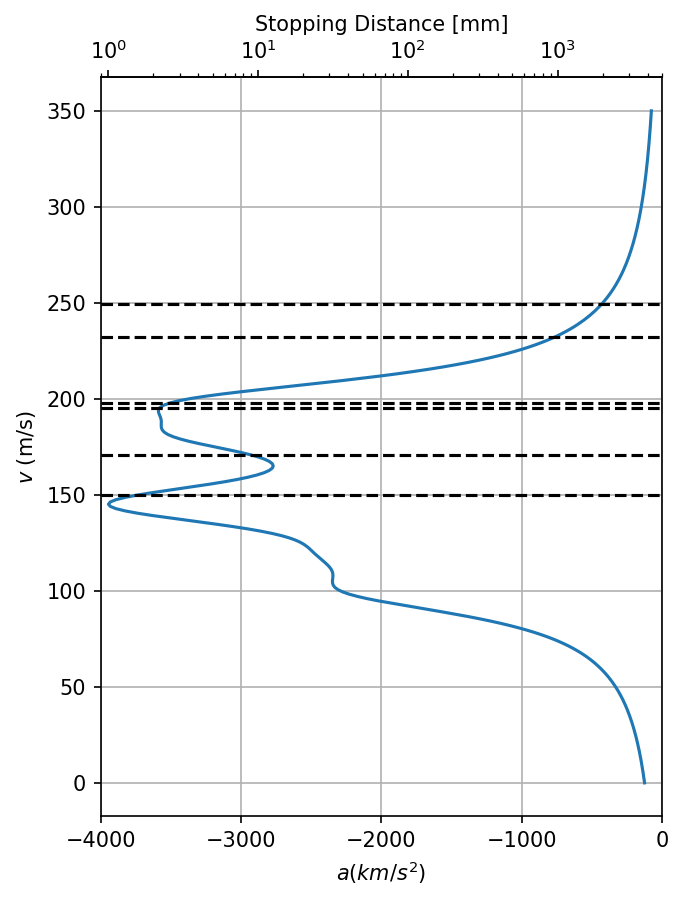

In [22]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.figsize'] = [4.8, 6.4]
mpl.rcParams['figure.dpi'] = 150


s = 2*0.2/(np.pi*(0.00125**2))/I_sat
obe.laserBeams={
    'X(v=0)->A(v=0)' : pylcp.laserBeams([
        {'kvec':np.array([-1, 0., 0.])*ksim, 'pol':1, 'delta':-100*k/Hz_unit, 's':s}
    ], beam_type=pylcp.infinitePlaneWaveBeam)}

rateeq = pylcp.rateeq(obe.laserBeams, obe.magField, obe.hamiltonian, include_mag_forces = False)
R = np.linspace(-10/cm_unit, 10/cm_unit, 100)
v = np.linspace(-0/velocity_unit, 350/velocity_unit, 300) 

rateeq.generate_force_profile([np.zeros(v.shape),np.zeros(v.shape),np.zeros(v.shape)],
                           [v                ,np.zeros(v.shape),np.zeros(v.shape)],
                           name='Frad', progress_bar=True)


fig, ax = plt.subplots(1, 1)

colormesh = ax.plot((rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27),v*velocity_unit)
ax.hlines((Es+150*k0)/k0,-4000,0,colors=['black']*6,linestyles=['dashed']*6)

def stopping_distance(x):
    x = np.array(x, float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 100**2 / (2*x[~near_zero])
    return x

ax.set_xlim([-4000,1])
axx2 = ax.secondary_xaxis('top',functions=(stopping_distance,stopping_distance))
axx2.set_xscale('log')
axx2.set_xlabel('Stopping Distance [mm]')
ax.set_ylabel('$v$ (m/s)')
ax.set_xlabel('$a(km/s^2)$')
ylim = ax.get_ylim()
ax.grid()
fig.subplots_adjust(left=0.12,right=0.9)
# fig.tight_layout()

In [1]:
import h5py    
import numpy as np

In [14]:
d= np.loadtxt("Q1source.txt")

In [15]:
d

array([[ 9.04836193e+00,  0.00000000e+00],
       [ 9.07668232e+00,  0.00000000e+00],
       [ 9.10518053e+00, -5.84035314e-02],
       ...,
       [ 2.32000000e+02,  1.46514092e+03],
       [ 2.32000000e+02,  1.46514092e+03],
       [ 2.32000000e+02,  1.46514092e+03]])

c:\Users\LP618\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  fig.canvas.print_figure(bytes_io, **kw)


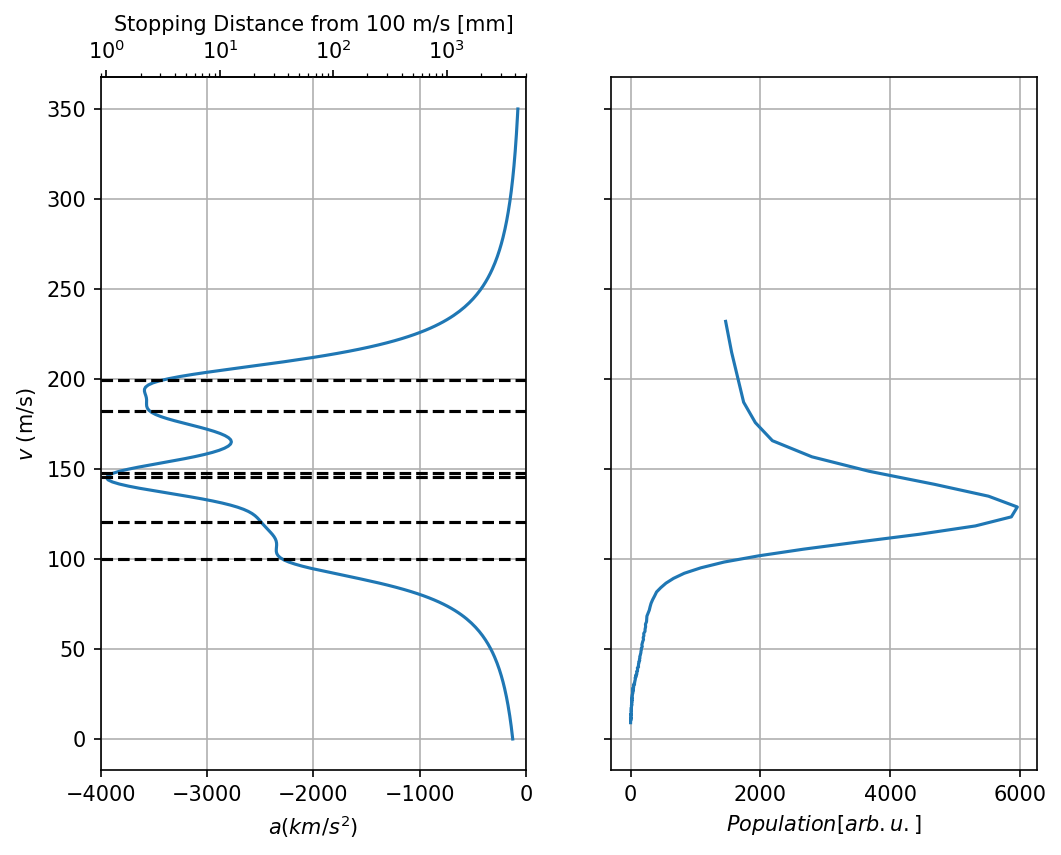

In [24]:
fig, (ax,ax2) = plt.subplots(1, 2,sharey=True,figsize=[8,6])

data = np.load("./f_profile.npy")

colormesh = ax.plot((rateeq.profile['Frad'].F[0])*F_unit*1e-3/(46*1.66e-27),v*velocity_unit)
ax.hlines((Es+100*k0)/k0,-4000,0,colors=['black']*6,linestyles=['dashed']*6)

def stopping_distance(x):
    x = np.array(x, float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 100**2 / (2*x[~near_zero])
    return x

ax.set_xlim([-4000,1])
axx2 = ax.secondary_xaxis('top',functions=(stopping_distance,stopping_distance))
axx2.set_xscale('log')
axx2.set_xlabel('Stopping Distance from 100 m/s [mm]')
ax.set_ylabel('$v$ (m/s)')
ax.set_xlabel('$a(km/s^2)$')

colormesh = ax2.plot(*(d.T[::-1]))
# ax2.set_xlim([1,-4000])
# ax2x2 = ax2.secondary_xaxis('top',functions=(stopping_distance,stopping_distance))
# ax2x2.set_xscale('log')
# ax2x2.set_xlabel('Stopping Distance [mm]')
# ax.set_ylabel('$v$ (m/s)')
ax2.set_xlabel('$Population [arb.u.]$')

ylim = ax.get_ylim()
ax.grid()
ax2.grid()
fig.subplots_adjust(left=0.12,right=0.9)
# fig.tight_layout()